# False Alarm Probabilities in LINEAR
**Author**: Nicholas Hunt-Walker<br/>
**Date**: 9/23/2015<br/>
**Purpose**: We calculate False Alarm Probabilities (FAPs) for periods measured for LINEAR objects. The calculation of FAPs is derived from <a href="http://adsabs.harvard.edu/abs/2008MNRAS.385.1279B">Baluev 2008</a>. Once calculated, we want to visualize the distribution of FAPs for LINEAR objects.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from gatspy.periodic import LombScargle, LombScargleFast

from astroML.datasets import fetch_LINEAR_sample
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=9, usetex=True)
import pandas as pd

In [2]:
#Load the dataset
data = fetch_LINEAR_sample()
ids = data.ids

In [3]:
# #Compute the best frequencies
# #Note: don't need to run this. Results have already been saved. Otherwise, takes
# # several hours to complete.
# def compute_best_frequencies(ids, quiet=True):
#     results = {}
#     for i in ids:
#         t, y, dy = data[i].T

#         ls = LombScargleFast().fit(t, y, dy)
#         ls.optimizer.quiet=quiet
#         ls.optimizer.period_range = (10**-1.5, 10)

#         periods = ls.find_best_periods()
#         fap = ls.false_alarm_max()
#         Npoints = len(t)
#         scores = ls.score(periods)

#         results[i] = [periods, fap, Npoints, scores]

#     return results

# results = compute_best_frequencies(ids)


In [4]:
results = pd.read_csv("faps.dat")
faps = np.array(results.faps)

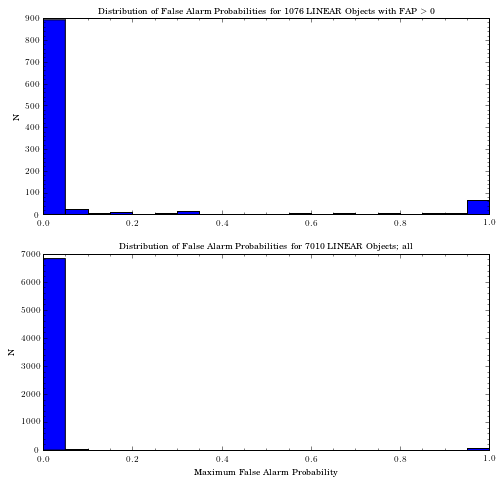

In [5]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(bottom=0.15)
titstr = "Distribution of False Alarm Probabilities for {0} LINEAR Objects"
nonzero = np.where(faps > 0)

ax = plt.subplot(211)
ax.set_title(titstr.format(sum(faps > 0)) + " with FAP $>$ 0")
ax.hist(faps[nonzero], bins=np.arange(0,1.0+0.05,0.05))
ax.set_ylabel("N")
ax.set_xlim(0,1)
ax.minorticks_on()

ax = plt.subplot(212)
ax.set_title(titstr.format(faps.size) + "; all")
ax.hist(faps, bins=np.linspace(0,1.0,21))
ax.set_xlabel("Maximum False Alarm Probability")
ax.set_ylabel("N")
ax.set_xlim(0,1)
ax.minorticks_on()

plt.show()

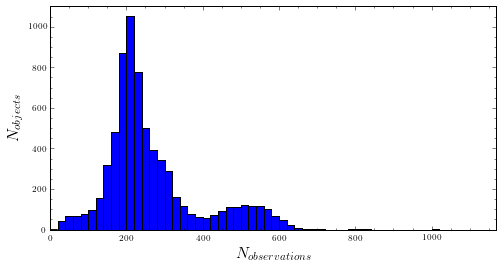

In [6]:
plt.figure(figsize=(8,4))
plt.hist(results.npoints, bins=np.arange(0, 1160, 20))
plt.xlim(0, 1170)
plt.ylim(0, 1100)
plt.xlabel("$N_{observations}$", fontsize=16)
plt.ylabel("$N_{objects}$", fontsize=16)
plt.minorticks_on()
plt.show()


In [7]:
new_scores = []
for ii in range(len(results.scores)):
    first_split = results.scores[ii][2:-1].split()
    new_array = np.array([float(s) for s in first_split])
    new_scores.append(new_array)
new_scores = np.array(new_scores)

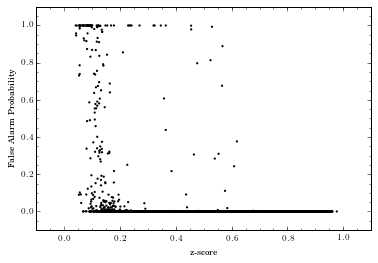

In [8]:
plt.scatter(new_scores[:,0], results.faps, s=5, edgecolor="None", c='k')
plt.minorticks_on()
plt.xlabel("z-score")
plt.ylabel("False Alarm Probability")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()